In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

Notebook directory: /zhome/97/a/203937
Image path: /zhome/97/a/203937/02516_poster_3/Potholes/annotated-images/img-415.jpg
XML path: /zhome/97/a/203937/02516_poster_3/Potholes/annotated-images/img-415.xml
Found bounding box: x=150, y=138, width=111, height=46
Found bounding box: x=84, y=79, width=74, height=18
Found bounding box: x=273, y=164, width=0, height=1


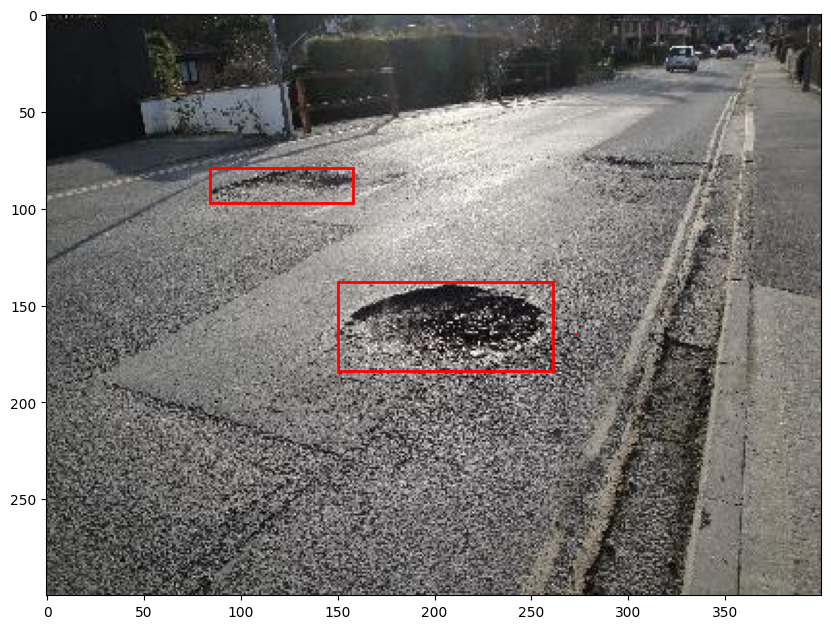

In [142]:
def parse_ground_truth_boxes_for_image(data_dir, image_filename):
    """
    Parse XML annotation file to create ground truth boxes for a specific image.
    """
    ground_truth_boxes = []
    xml_file = image_filename.replace('.jpg', '.xml')
    xml_path = os.path.join(data_dir, xml_file)
    print("XML path:", xml_path)
    
    if not os.path.exists(xml_path):
        print(f"Annotation file for {image_filename} not found.")
        return ground_truth_boxes

    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    for obj in root.findall("object"):
        bbox = obj.find("bndbox")
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)
        width = xmax - xmin
        height = ymax - ymin
        og_size = int(root.find("size").find("width").text), int(root.find("size").find("height").text)
        ground_truth_boxes.append({"x": xmin, "y": ymin, "width": width, "height": height, "original_size": og_size})
        print(f"Found bounding box: x={xmin}, y={ymin}, width={width}, height={height}")
    
    return ground_truth_boxes

def plot_image_with_boxes(image_path, boxes):
    """
    Plot the image with bounding boxes on top.
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    for box in boxes:
        rect = plt.Rectangle((box["x"], box["y"]), box["width"], box["height"], edgecolor='r', facecolor='none', linewidth=2)
        plt.gca().add_patch(rect)
    
    plt.show()

# Process a specific image
notebook_dir = os.getcwd()
print("Notebook directory:", notebook_dir)
data_dir = "02516_poster_3/Potholes/annotated-images"
data_dir = os.path.join(notebook_dir, data_dir)
image_filename = "img-415.jpg"  # Replace with your image filename
image_path = os.path.join(data_dir, image_filename)
print("Image path:", image_path)
ground_truth_boxes = parse_ground_truth_boxes_for_image(data_dir, image_filename)

# Plot the image with bounding boxes
plot_image_with_boxes(image_path, ground_truth_boxes)